In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
#read data
df = pd.read_csv("ex1data2.txt", header=None, delim_whitespace=True)
tamanho = df.index.size
print(tamanho)
split = int(0.7*tamanho)
dfTrain = df[ : split]
dfTrain

47


,0,1,2
0,2.104,3,3.99900
1,1.600,3,3.29900
2,2.400,3,3.69000
3,1.416,2,2.32000
4,3.000,4,5.39900
5,1.985,4,2.99900
6,1.534,3,3.14900
7,1.427,3,1.98999
8,1.380,3,2.12000
9,1.494,3,2.42500


In [4]:
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [33]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, alpha, n_epoch):
    print (train)
    print('-----')
    print (train[:-1])
    list_mse = []
    coef = [0.0 for i in range(len(train[:-1]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train[:-1]:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - alpha * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - alpha * error * row[i]
        print('>epoch=%d, alpha=%.3f, error=%.3f' % (epoch, alpha, sum_error/len(train[:-1])))
        list_mse.append(sum_error/len(train[:-1]))
    return list_mse, coef

In [34]:
list_mse, coef = coefficients_sgd(dfTrain.values, 0.01, 100)

[[ 2.104    3.       3.999  ]
 [ 1.6      3.       3.299  ]
 [ 2.4      3.       3.69   ]
 [ 1.416    2.       2.32   ]
 [ 3.       4.       5.399  ]
 [ 1.985    4.       2.999  ]
 [ 1.534    3.       3.149  ]
 [ 1.427    3.       1.98999]
 [ 1.38     3.       2.12   ]
 [ 1.494    3.       2.425  ]
 [ 1.94     4.       2.39999]
 [ 2.       3.       3.47   ]
 [ 1.89     3.       3.29999]
 [ 4.478    5.       6.999  ]
 [ 1.268    3.       2.599  ]
 [ 2.3      4.       4.499  ]
 [ 1.32     2.       2.999  ]
 [ 1.236    3.       1.999  ]
 [ 2.609    4.       4.99998]
 [ 3.031    4.       5.99   ]
 [ 1.767    3.       2.529  ]
 [ 1.888    2.       2.55   ]
 [ 1.604    3.       2.429  ]
 [ 1.962    4.       2.599  ]
 [ 3.89     3.       5.739  ]
 [ 1.1      3.       2.499  ]
 [ 1.458    3.       4.645  ]
 [ 2.526    3.       4.69   ]
 [ 2.2      3.       4.75   ]
 [ 2.637    3.       2.999  ]
 [ 1.839    2.       3.499  ]
 [ 1.       1.       1.699  ]]
[[ 2.104    3.       3.999  ]
 [ 1.6   

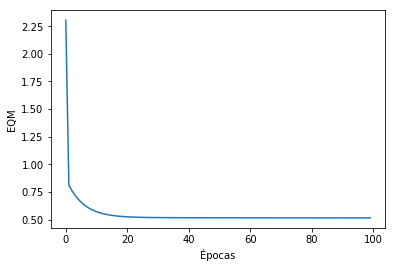

In [32]:
plt.plot(np.arange(len(list_mse)), list_mse)
plt.xlabel("Épocas")
plt.ylabel("EQM")
plt.show()